In [ ]:
print("Let's starts baby")

In [1]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [2]:
BASE_DIR = '/kaggle/input/flickr8k'
WORKING_DIR = '/kaggle/working'

## Architecture of VGG16
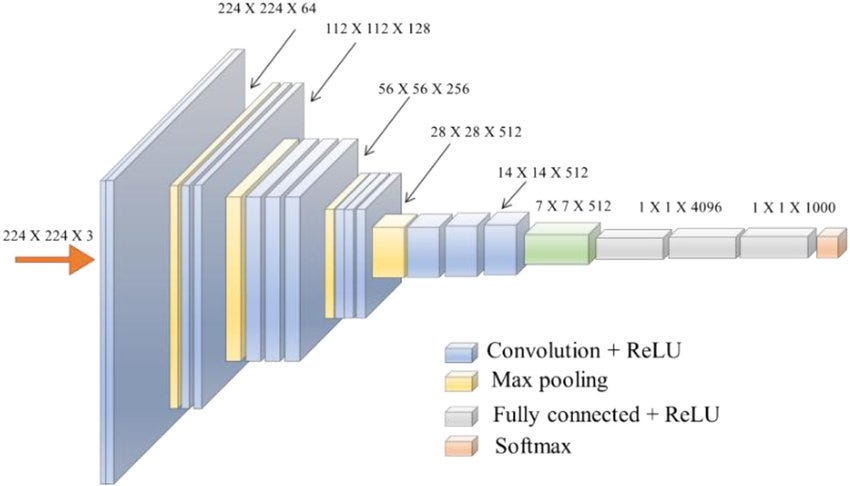

## Understanding VGG16

### Overview

VGG16 is a convolutional neural network architecture developed by the Visual Geometry Group (VGG) at the University of Oxford. It is known for its simplicity and effectiveness in image classification tasks. VGG16 was introduced in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition" by Karen Simonyan and Andrew Zisserman.

### Architecture

VGG16 is composed of 16 layers, which include 13 convolutional layers and 3 fully connected (dense) layers. The architecture is characterized by its use of small convolutional filters (3x3) and a deep network structure. Here is a detailed breakdown of the VGG16 architecture:

1. **Convolutional Layers**:
   - **First Block**:
     - Two convolutional layers with 64 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Second Block**:
     - Two convolutional layers with 128 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Third Block**:
     - Three convolutional layers with 256 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Fourth Block**:
     - Three convolutional layers with 512 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Fifth Block**:
     - Three convolutional layers with 512 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.

2. **Fully Connected Layers**:
   - **First Dense Layer**:
     - A fully connected layer with 4096 units and ReLU activation.
   - **Second Dense Layer**:
     - A fully connected layer with 4096 units and ReLU activation.
   - **Third Dense Layer**:
     - A fully connected layer with 1000 units (corresponding to the number of classes in the ImageNet dataset) and a softmax activation function.

3. **Output Layer**:
   - The output layer provides the probabilities for each class, based on the classification task.

### Key Features

- **Small Convolutional Filters**: VGG16 uses 3x3 convolutional filters throughout the network, which helps in capturing fine details and patterns in images.
- **Deep Architecture**: The network is relatively deep, which allows it to learn hierarchical features from the data.
- **Max-Pooling**: Max-pooling layers are used to reduce the spatial dimensions of the feature maps and introduce translational invariance.
- **ReLU Activation**: The ReLU activation function is applied after each convolutional layer and dense layer to introduce non-linearity.

### Applications

- **Image Classification**: VGG16 has been widely used for image classification tasks and serves as a backbone for various computer vision models.
- **Feature Extraction**: The convolutional layers of VGG16 can be used as a feature extractor in transfer learning and other tasks.
- **Transfer Learning**: Pre-trained VGG16 models can be fine-tuned for specific tasks by adding and training additional layers.

### Summary

VGG16 is a foundational model in computer vision, known for its simplicity and effectiveness in image recognition tasks. Its deep architecture and consistent use of small convolutional filters make it a versatile model for various image processing applications.


In [3]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


## Extracting Features from Images

1. **Initialize the Features Dictionary**:
   - Create an empty dictionary, `features`, to store the extracted features for each image.

2. **Set Up the Directory Path**:
   - Define the directory containing the images using the `BASE_DIR` and `Images` folder.

3. **Iterate Over Images in the Directory**:
   - Loop through each image file in the specified directory using `os.listdir()`.

4. **Load and Preprocess Each Image**:
   - For each image file:
     - Construct the full path to the image.
     - Load the image from the file and resize it to `(224, 224)` pixels.
     - Convert the image to a numpy array.
     - Reshape the array to match the input shape required by the model (e.g., adding an extra dimension).

5. **Preprocess the Image for VGG**:
   - Apply the preprocessing function to prepare the image for feature extraction using the VGG model.

6. **Extract Features Using the Model**:
   - Use the model to predict the features of the preprocessed image.
   - The `predict()` function will return the feature representation of the image.

7. **Store Features in the Dictionary**:
   - Extract the image ID from the filename (excluding the extension).
   - Store the extracted features in the dictionary with the image ID as the key.

By following these steps, we can efficiently extract and store features from a collection of images using a pre-trained model.


In [4]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'Images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

I0000 00:00:1726578570.071381     105 service.cc:145] XLA service 0x7ab388004ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726578570.071470     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726578570.071476     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726578572.714220     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


## Understanding Pickle in Python

### What is Pickle?

Pickle is a Python module used for serializing and deserializing Python objects. Serialization (or "pickling") converts a Python object into a byte stream, and deserialization (or "unpickling") converts the byte stream back into a Python object. This allows you to save Python objects to a file or transmit them over a network and later restore them.

### Key Functions

1. **`pickle.dump(obj, file)`**:
   - **Purpose**: Serializes a Python object and writes it to a file.
   - **Parameters**:
     - `obj`: The Python object to be serialized.
     - `file`: A file-like object where the serialized data will be written.
   - **Example**: `pickle.dump(my_data, open('data.pkl', 'wb'))`

2. **`pickle.load(file)`**:
   - **Purpose**: Deserializes data from a file and restores it to its original Python object form.
   - **Parameters**:
     - `file`: A file-like object containing the serialized data.
   - **Example**: `my_data = pickle.load(open('data.pkl', 'rb'))`

3. **`pickle.dumps(obj)`**:
   - **Purpose**: Serializes a Python object to a byte stream (as a `bytes` object).
   - **Parameters**:
     - `obj`: The Python object to be serialized.
   - **Example**: `byte_stream = pickle.dumps(my_data)`

4. **`pickle.loads(byte_stream)`**:
   - **Purpose**: Deserializes a byte stream back into a Python object.
   - **Parameters**:
     - `byte_stream`: The byte stream containing serialized data.
   - **Example**: `my_data = pickle.loads(byte_stream)`

### Use Cases

- **Saving Objects**: Useful for saving complex data structures (like machine learning models) to a file so that they can be loaded and used later without needing to re-create them.
- **Data Transmission**: Can be used to serialize data to send over a network.

### Security Considerations

- **Security Risks**: Be cautious when loading pickle files from untrusted sources, as deserializing data can execute arbitrary code and potentially introduce security vulnerabilities.

### Example

Here's a simple example of using Pickle to save and load a Python dictionary:

```python
import pickle

# Data to be pickled
data = {'key': 'value', 'number': 42}

# Serialize and save the data
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

# Load and deserialize the data
with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print(loaded_data)  # Output: {'key': 'value', 'number': 42}


In [5]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [6]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

## Load the Captions Data

In [7]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

## Creating a Mapping of Images to Captions

### Purpose

This process involves creating a mapping between image identifiers and their associated captions. The goal is to organize and store captions in a way that they can be easily accessed using image IDs.

### Steps

1. **Initialize a Mapping Dictionary**:
   - Create an empty dictionary, `mapping`, to store image IDs as keys and their corresponding captions as values.

2. **Process Each Line of the Captions Document**:
   - Iterate through each line of the `captions_doc`, which contains image IDs and captions.

3. **Split the Line**:
   - Split each line by commas (`,`) to separate the image ID from the captions.

4. **Skip Short Lines**:
   - Skip lines that do not contain at least two elements (i.e., the image ID and at least one caption).

5. **Extract Image ID and Caption**:
   - Extract the image ID from the first element of the split line.
   - Remove the file extension from the image ID if it is present.
   - Combine the remaining elements to form the caption string.

6. **Add to the Mapping**:
   - Check if the image ID already exists in the dictionary. If not, create an entry with an empty list.
   - Append the caption to the list associated with the image ID.

### Summary

This process efficiently organizes captions for each image by storing them in a dictionary where the image ID is the key and the associated captions are the values. This structure facilitates easy retrieval and management of captions related to specific images.


In [8]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

## preprocess the data

## Cleaning Captions

### Purpose

The function `clean` is designed to preprocess and clean caption text data. This ensures consistency and quality in captions before they are used for training models or other data processing tasks.

### Steps

1. **Iterate Over Captions**:
   - For each key in the `mapping` dictionary (where each key corresponds to an image), retrieve the list of captions associated with that key.

2. **Process Each Caption**:
   - For each caption in the list:
     - Convert the caption to lowercase to standardize the text.
     - Remove any digits, special characters, or punctuation from the caption.
     - Remove extra spaces or multiple consecutive spaces to ensure clean spacing.
     - Add special start and end tags (`startseq` and `endseq`) around the caption to denote the beginning and end of sequences.

3. **Update the Caption**:
   - Replace the original caption with the cleaned caption in the list.

### Summary

This cleaning function prepares captions by converting text to lowercase, removing unwanted characters, standardizing spaces, and adding sequence tags. This preprocessing improves the quality and consistency of the text data, making it more suitable for training and analysis.


In [11]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [12]:
# before preprocess of text
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [13]:
# preprocess the text
clean(mapping)

In [12]:
# preprocess the text
clean(mapping)

In [14]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [15]:
len(all_captions)

40455

In [16]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [17]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [18]:
vocab_size

8485

In [19]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

## Train Test Split

In [20]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
# startseq girl going into wooden building endseq
#        X                   y
# startseq                   girl
# startseq girl              going
# startseq girl going        into
# ...........
# startseq girl going into wooden building      endseq

## Creating a Data Generator for Batch Processing

### Purpose

A data generator is used to efficiently yield batches of data for training models, especially when dealing with large datasets that could cause memory issues or session crashes if loaded all at once.

### Steps

1. **Initialize Lists for Data Storage**:
   - Create empty lists, `X1`, `X2`, and `y`, to store image features, input sequences, and output sequences, respectively.

2. **Loop Continuously**:
   - Use an infinite loop (`while 1`) to continuously generate batches of data.

3. **Process Each Image**:
   - Iterate over each image key in `data_keys`.
   - Retrieve the associated captions for the current image.

4. **Process Each Caption**:
   - For each caption:
     - Encode the caption into a sequence of integers using the tokenizer.
     - Split the sequence into input-output pairs where the input is a portion of the sequence, and the output is the next token.

5. **Prepare Input and Output Sequences**:
   - For each input-output pair:
     - Pad the input sequence to ensure consistent length.
     - Convert the output sequence to a one-hot encoded vector.
     - Store the image features, padded input sequence, and one-hot encoded output in their respective lists.

6. **Yield Data in Batches**:
   - Once the accumulated number of sequences reaches the batch size:
     - Convert the lists `X1`, `X2`, and `y` to numpy arrays.
     - Yield a batch containing the image features and input sequences as inputs, and the output sequences as targets.
     - Reset the lists and counter for the next batch.

### Summary

This data generator facilitates efficient and scalable training by providing batches of image features and caption sequences. It prevents memory overflow by processing data in manageable chunks and yields batches of data that can be fed into a model for training.


In [21]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

## Model Creation

## Building the Encoder-Decoder Model

### Purpose

The model combines features from both image and text inputs to generate predictions, typically for tasks like image captioning.

### Components

1. **Image Feature Layers**:
   - **Input Layer**: Accepts image features with a shape of `(4096,)`.
   - **Dropout Layer**: Applies dropout with a rate of 0.4 to reduce overfitting.
   - **Dense Layer**: Applies a dense layer with 256 units and ReLU activation to process the image features.

2. **Sequence Feature Layers**:
   - **Input Layer**: Accepts text sequences with a shape of `(max_length,)`.
   - **Embedding Layer**: Converts text sequences into dense vectors of size 256. Uses masking to handle variable-length sequences.
   - **Dropout Layer**: Applies dropout with a rate of 0.4 to prevent overfitting.
   - **LSTM Layer**: Processes the embedded text sequences using LSTM with 256 units to capture sequential dependencies.

3. **Decoder Model**:
   - **Add Layer**: Merges the processed image features and text features by adding them together.
   - **Dense Layer**: Applies a dense layer with 256 units and ReLU activation to further process the combined features.
   - **Output Layer**: Produces final predictions using a dense layer with softmax activation, outputting probabilities over the vocabulary.

### Model Configuration

- **Model Definition**: Defines the model using both image and text inputs and produces outputs.
- **Compilation**: The model is compiled with categorical crossentropy loss and the Adam optimizer.

### Visualization

The model architecture is visualized using `plot_model`, which shows the shapes of the input and output tensors, and the connections between layers.

### Summary

This model integrates image and text features through separate pathways, combines them, and generates predictions. The use of dropout, dense layers, and LSTM helps in processing and learning from the image and text data effectively.


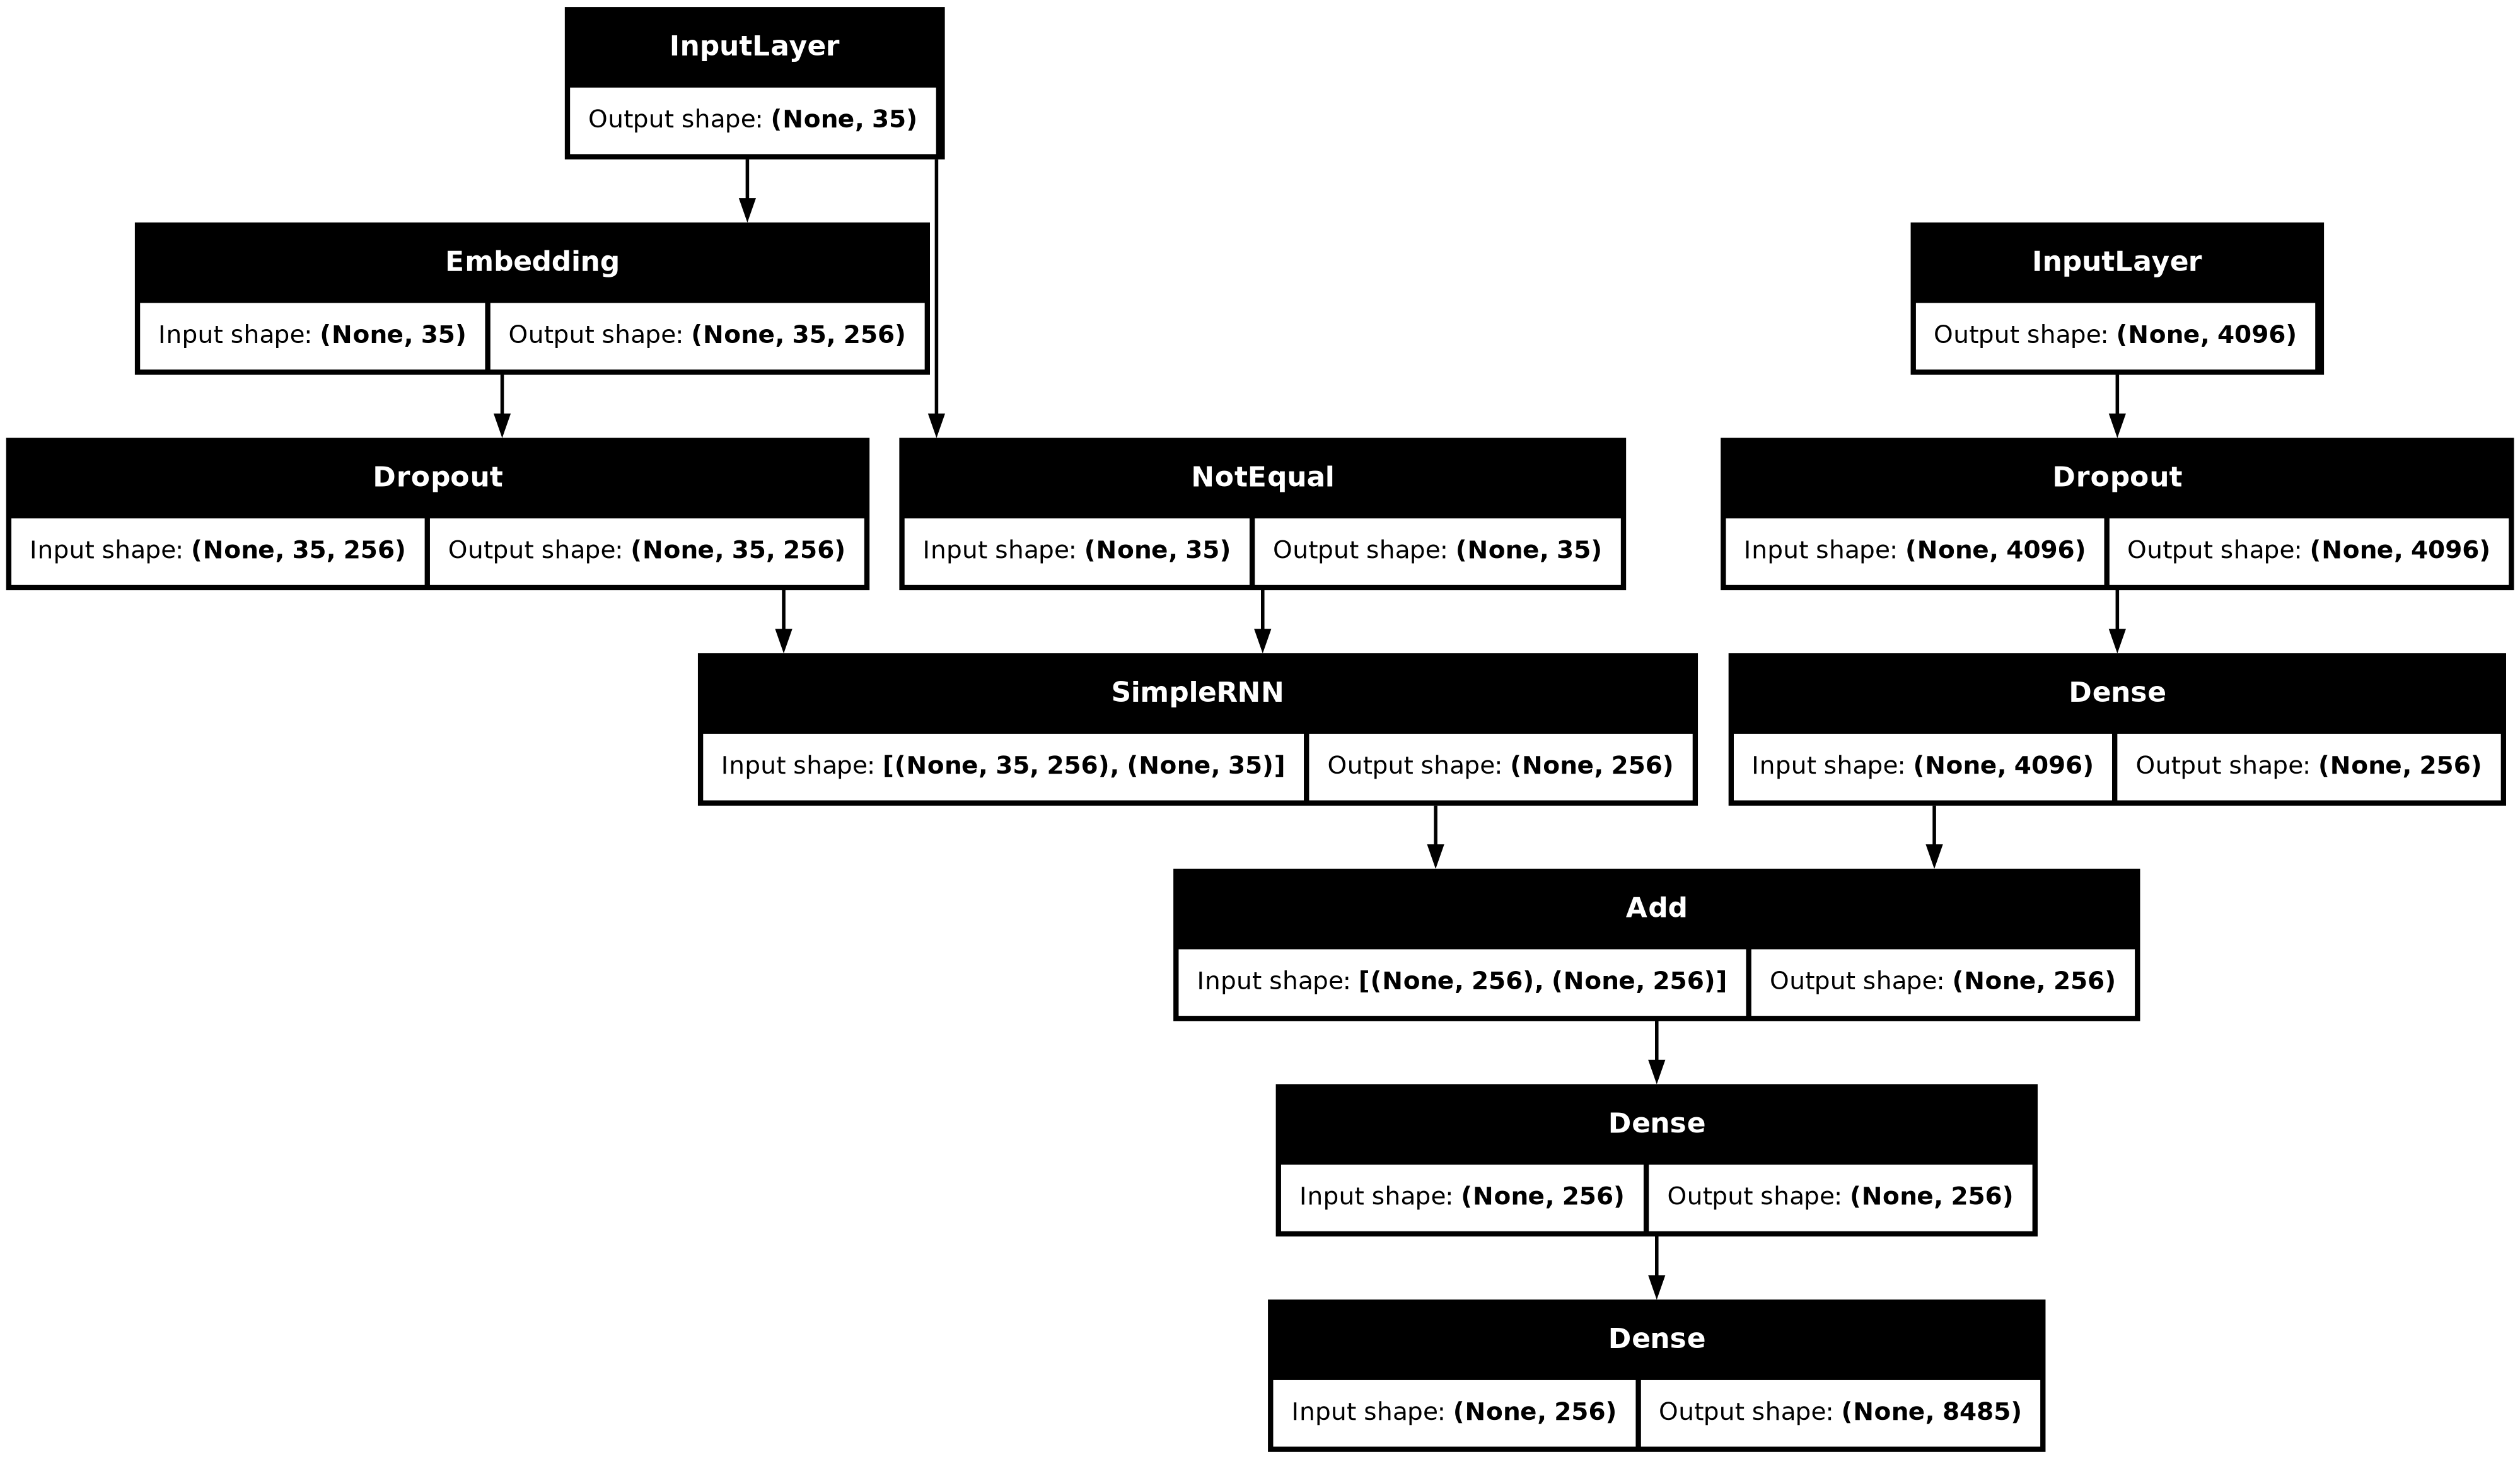

In [29]:
from keras.layers import Input, Dropout, Dense, Embedding, SimpleRNN, Add
from keras.models import Model
from keras.utils import plot_model

# Image feature layers
inputs1 = Input(shape=(4096,), name="image")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# Sequence feature layers
inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
# Use SimpleRNN to avoid cuDNN
se3 = SimpleRNN(256)(se2)

# Decoder model
decoder1 = Add()([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Plot the model
plot_model(model, show_shapes=True)


## Training the Model

### Purpose

The training loop is designed to fit the model to the data over a specified number of epochs, using a data generator to manage memory and efficiency.

### Steps

1. **Set Training Parameters**:
   - **Epochs**: The number of times the entire dataset will pass through the model. In this case, it is set to 20 epochs.
   - **Batch Size**: The number of samples processed before the model updates. Here, it is set to 32.
   - **Steps Per Epoch**: The number of batches to process in each epoch. It is calculated as the total number of training samples divided by the batch size.

2. **Training Loop**:
   - **Iterate Over Epochs**: For each epoch, the following steps are executed:
     - **Create Data Generator**: Initializes the `data_generator` function to yield batches of data.
     - **Fit the Model**: Trains the model for one epoch using the `fit` method, with the data generator as the input. The `steps_per_epoch` parameter specifies how many batches to process before concluding the epoch. Verbosity is set to 1 to display training progress.

### Summary

This code trains the model over a series of epochs using a data generator to efficiently handle large datasets. The model updates its weights based on the data provided by the generator, improving its performance on the task.


In [30]:
epochs = 20
batch_size = 32
steps = (len(train) + batch_size - 1) // batch_size  # Ensure all batches are covered

for i in range(epochs):
    # Create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # Fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)


I0000 00:00:1726580764.748999   65055 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726580766.012803   65057 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



  1/228 ━━━━━━━━━━━━━━━━━━━━ 1:00:18 16s/step - loss: 9.1220

I0000 00:00:1726580778.110629   65083 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580780.008800   65082 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



  2/228 ━━━━━━━━━━━━━━━━━━━━ 53:20 14s/step - loss: 9.0287  

I0000 00:00:1726580789.332055   65107 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726580792.462803   65106 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580794.039603   65105 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



  3/228 ━━━━━━━━━━━━━━━━━━━━ 52:30 14s/step - loss: 8.9003

I0000 00:00:1726580805.061810   65129 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580807.442166   65131 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



  4/228 ━━━━━━━━━━━━━━━━━━━━ 51:29 14s/step - loss: 8.7306

I0000 00:00:1726580819.108664   65153 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580823.047826   65154 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



  6/228 ━━━━━━━━━━━━━━━━━━━━ 42:16 11s/step - loss: 8.4372

I0000 00:00:1726580836.008625   65177 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726580836.782964   65179 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



  7/228 ━━━━━━━━━━━━━━━━━━━━ 43:25 12s/step - loss: 8.3024

I0000 00:00:1726580850.135130   65203 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580850.391435   65202 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



  8/228 ━━━━━━━━━━━━━━━━━━━━ 44:11 12s/step - loss: 8.1816

I0000 00:00:1726580861.278301   65225 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580863.291284   65226 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



  9/228 ━━━━━━━━━━━━━━━━━━━━ 44:23 12s/step - loss: 8.0756

I0000 00:00:1726580875.806046   65250 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580876.668972   65251 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 10/228 ━━━━━━━━━━━━━━━━━━━━ 44:47 12s/step - loss: 7.9811

I0000 00:00:1726580887.892778   65275 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726580889.648674   65276 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726580890.037966   65274 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 11/228 ━━━━━━━━━━━━━━━━━━━━ 44:50 12s/step - loss: 7.8954

I0000 00:00:1726580902.448129   65300 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726580904.179650   65297 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 12/228 ━━━━━━━━━━━━━━━━━━━━ 45:13 13s/step - loss: 7.8183

I0000 00:00:1726580915.585549   65324 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580920.504330   65323 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 13/228 ━━━━━━━━━━━━━━━━━━━━ 46:07 13s/step - loss: 7.7487

I0000 00:00:1726580931.949030   65345 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580933.977603   65348 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 14/228 ━━━━━━━━━━━━━━━━━━━━ 46:04 13s/step - loss: 7.6859

I0000 00:00:1726580941.578772   65370 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726580946.157833   65371 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580949.586211   65372 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 15/228 ━━━━━━━━━━━━━━━━━━━━ 46:31 13s/step - loss: 7.6280

I0000 00:00:1726580958.381354   65397 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726580961.276510   65396 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726580962.347291   65395 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 16/228 ━━━━━━━━━━━━━━━━━━━━ 46:15 13s/step - loss: 7.5752

I0000 00:00:1726580972.948684   65420 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726580974.715549   65419 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726580976.242555   65421 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 17/228 ━━━━━━━━━━━━━━━━━━━━ 46:12 13s/step - loss: 7.5262

I0000 00:00:1726580986.169112   65445 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726580988.749417   65444 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726580989.506460   65442 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 18/228 ━━━━━━━━━━━━━━━━━━━━ 46:00 13s/step - loss: 7.4794

I0000 00:00:1726581001.951395   65469 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581002.487501   65466 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 19/228 ━━━━━━━━━━━━━━━━━━━━ 45:45 13s/step - loss: 7.4358

I0000 00:00:1726581013.053093   65490 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581013.960046   65491 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581016.728333   65493 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 20/228 ━━━━━━━━━━━━━━━━━━━━ 45:44 13s/step - loss: 7.3952

I0000 00:00:1726581025.489025   65514 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581029.491388   65515 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581030.249285   65514 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 21/228 ━━━━━━━━━━━━━━━━━━━━ 45:34 13s/step - loss: 7.3569

I0000 00:00:1726581041.751243   65540 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581045.433184   65538 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 22/228 ━━━━━━━━━━━━━━━━━━━━ 45:40 13s/step - loss: 7.3204

I0000 00:00:1726581057.523788   65563 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581059.813536   65562 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 23/228 ━━━━━━━━━━━━━━━━━━━━ 45:37 13s/step - loss: 7.2858

I0000 00:00:1726581070.667891   65588 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581075.030550   65590 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 24/228 ━━━━━━━━━━━━━━━━━━━━ 45:40 13s/step - loss: 7.2529

I0000 00:00:1726581085.970680   65611 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581087.365341   65614 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581088.368627   65612 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 25/228 ━━━━━━━━━━━━━━━━━━━━ 45:26 13s/step - loss: 7.2214

I0000 00:00:1726581099.148836   65638 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581102.373267   65635 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 26/228 ━━━━━━━━━━━━━━━━━━━━ 45:19 13s/step - loss: 7.1918

I0000 00:00:1726581114.520462   65662 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581117.617855   65660 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 27/228 ━━━━━━━━━━━━━━━━━━━━ 45:17 14s/step - loss: 7.1636

I0000 00:00:1726581128.947255   65686 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581130.115179   65685 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581130.862370   65684 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 30/228 ━━━━━━━━━━━━━━━━━━━━ 41:31 13s/step - loss: 7.0860

I0000 00:00:1726581143.757640   65707 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581144.623990   65709 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 31/228 ━━━━━━━━━━━━━━━━━━━━ 41:26 13s/step - loss: 7.0621

I0000 00:00:1726581153.378769   65734 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581157.440521   65733 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581157.738609   65731 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 32/228 ━━━━━━━━━━━━━━━━━━━━ 41:16 13s/step - loss: 7.0391

I0000 00:00:1726581165.989744   65758 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581170.269824   65755 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581172.289911   65758 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 34/228 ━━━━━━━━━━━━━━━━━━━━ 39:49 12s/step - loss: 6.9953

I0000 00:00:1726581185.013728   65779 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581185.584440   65782 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 35/228 ━━━━━━━━━━━━━━━━━━━━ 39:41 12s/step - loss: 6.9744

I0000 00:00:1726581196.498705   65807 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581200.191781   65804 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 36/228 ━━━━━━━━━━━━━━━━━━━━ 39:42 12s/step - loss: 6.9541

I0000 00:00:1726581210.061002   65830 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581212.403204   65829 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581213.594219   65831 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 37/228 ━━━━━━━━━━━━━━━━━━━━ 39:35 12s/step - loss: 6.9345

I0000 00:00:1726581221.699317   65852 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581226.660208   65854 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581226.984943   65855 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 38/228 ━━━━━━━━━━━━━━━━━━━━ 39:27 12s/step - loss: 6.9155

I0000 00:00:1726581238.295904   65877 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581239.182034   65879 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581242.170630   65876 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 39/228 ━━━━━━━━━━━━━━━━━━━━ 39:28 13s/step - loss: 6.8970

I0000 00:00:1726581254.363731   65901 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581257.393319   65903 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 40/228 ━━━━━━━━━━━━━━━━━━━━ 39:29 13s/step - loss: 6.8790

I0000 00:00:1726581270.711366   65926 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581272.408453   65927 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 41/228 ━━━━━━━━━━━━━━━━━━━━ 39:27 13s/step - loss: 6.8615

I0000 00:00:1726581283.619220   65948 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581284.988104   65951 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581285.672550   65950 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 42/228 ━━━━━━━━━━━━━━━━━━━━ 39:17 13s/step - loss: 6.8446

I0000 00:00:1726581296.230123   65973 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581299.084100   65972 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581299.096518   65974 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 44/228 ━━━━━━━━━━━━━━━━━━━━ 38:01 12s/step - loss: 6.8120

I0000 00:00:1726581309.176946   65997 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581311.909273   66000 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581312.260116   65999 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 45/228 ━━━━━━━━━━━━━━━━━━━━ 37:51 12s/step - loss: 6.7962

I0000 00:00:1726581324.830529   66024 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581326.669667   66021 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 46/228 ━━━━━━━━━━━━━━━━━━━━ 37:47 12s/step - loss: 6.7807

I0000 00:00:1726581337.445864   66046 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581337.669592   66047 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581341.910140   66045 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 47/228 ━━━━━━━━━━━━━━━━━━━━ 37:46 13s/step - loss: 6.7655

I0000 00:00:1726581352.396914   66072 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581354.932152   66069 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581355.720281   66070 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 48/228 ━━━━━━━━━━━━━━━━━━━━ 37:38 13s/step - loss: 6.7504

I0000 00:00:1726581367.077529   66095 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581371.693194   66094 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 50/228 ━━━━━━━━━━━━━━━━━━━━ 36:40 12s/step - loss: 6.7214

I0000 00:00:1726581381.734217   66118 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581384.875276   66117 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581385.325306   66119 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 51/228 ━━━━━━━━━━━━━━━━━━━━ 36:32 12s/step - loss: 6.7073

I0000 00:00:1726581395.959778   66142 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581398.556832   66144 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581398.791813   66141 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 52/228 ━━━━━━━━━━━━━━━━━━━━ 36:23 12s/step - loss: 6.6936

I0000 00:00:1726581410.323388   66167 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581412.697975   66168 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 53/228 ━━━━━━━━━━━━━━━━━━━━ 36:16 12s/step - loss: 6.6801

I0000 00:00:1726581424.357396   66191 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581427.303688   66192 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 54/228 ━━━━━━━━━━━━━━━━━━━━ 36:11 12s/step - loss: 6.6669

I0000 00:00:1726581435.693582   66217 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581439.730363   66214 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581441.600956   66216 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 55/228 ━━━━━━━━━━━━━━━━━━━━ 36:04 13s/step - loss: 6.6539

I0000 00:00:1726581453.754944   66238 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581456.205062   66240 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 56/228 ━━━━━━━━━━━━━━━━━━━━ 35:58 13s/step - loss: 6.6415

I0000 00:00:1726581468.061978   66265 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581472.631393   66262 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 57/228 ━━━━━━━━━━━━━━━━━━━━ 35:58 13s/step - loss: 6.6295

I0000 00:00:1726581480.888944   66288 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581485.555555   66289 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581486.564737   66286 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 59/228 ━━━━━━━━━━━━━━━━━━━━ 34:59 12s/step - loss: 6.6059

I0000 00:00:1726581494.035041   66311 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581499.586698   66310 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581500.626696   66313 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 60/228 ━━━━━━━━━━━━━━━━━━━━ 34:51 12s/step - loss: 6.5944

I0000 00:00:1726581513.207753   66335 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581514.481884   66336 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 62/228 ━━━━━━━━━━━━━━━━━━━━ 33:56 12s/step - loss: 6.5722

I0000 00:00:1726581527.317283   66358 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581528.801809   66361 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 65/228 ━━━━━━━━━━━━━━━━━━━━ 32:23 12s/step - loss: 6.5401

I0000 00:00:1726581542.305208   66383 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581542.356517   66382 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 66/228 ━━━━━━━━━━━━━━━━━━━━ 32:14 12s/step - loss: 6.5297

I0000 00:00:1726581555.033251   66410 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581556.251763   66409 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 68/228 ━━━━━━━━━━━━━━━━━━━━ 31:27 12s/step - loss: 6.5095

I0000 00:00:1726581569.124017   66434 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581569.332316   66432 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 69/228 ━━━━━━━━━━━━━━━━━━━━ 31:18 12s/step - loss: 6.4996

I0000 00:00:1726581577.704294   66457 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581581.743071   66458 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581584.402892   66455 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 71/228 ━━━━━━━━━━━━━━━━━━━━ 30:35 12s/step - loss: 6.4804

I0000 00:00:1726581594.713227   66479 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581597.286428   66480 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581598.957056   66481 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 72/228 ━━━━━━━━━━━━━━━━━━━━ 30:30 12s/step - loss: 6.4709

I0000 00:00:1726581610.342551   66504 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581611.817060   66503 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581612.293174   66505 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 73/228 ━━━━━━━━━━━━━━━━━━━━ 30:21 12s/step - loss: 6.4615

I0000 00:00:1726581625.138891   66529 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581627.596881   66527 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 74/228 ━━━━━━━━━━━━━━━━━━━━ 30:17 12s/step - loss: 6.4522

I0000 00:00:1726581638.192380   66551 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581640.447283   66552 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581641.166396   66553 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 75/228 ━━━━━━━━━━━━━━━━━━━━ 30:09 12s/step - loss: 6.4431

I0000 00:00:1726581652.829740   66578 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581653.479519   66576 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581655.619671   66577 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 77/228 ━━━━━━━━━━━━━━━━━━━━ 29:27 12s/step - loss: 6.4252

I0000 00:00:1726581664.546605   66603 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581668.624175   66600 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581669.398401   66601 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 78/228 ━━━━━━━━━━━━━━━━━━━━ 29:19 12s/step - loss: 6.4164

I0000 00:00:1726581680.485397   66627 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581683.457889   66625 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 80/228 ━━━━━━━━━━━━━━━━━━━━ 28:39 12s/step - loss: 6.3992

I0000 00:00:1726581697.161437   66648 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581697.345200   66649 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 81/228 ━━━━━━━━━━━━━━━━━━━━ 28:31 12s/step - loss: 6.3908

I0000 00:00:1726581709.770186   66675 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581710.385438   66673 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 82/228 ━━━━━━━━━━━━━━━━━━━━ 28:22 12s/step - loss: 6.3826

I0000 00:00:1726581723.336586   66697 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581724.990459   66696 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 83/228 ━━━━━━━━━━━━━━━━━━━━ 28:15 12s/step - loss: 6.3744

I0000 00:00:1726581736.028561   66720 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581736.627558   66723 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581739.521308   66722 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 85/228 ━━━━━━━━━━━━━━━━━━━━ 27:37 12s/step - loss: 6.3584

I0000 00:00:1726581752.016523   66744 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581752.267690   66747 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581753.353523   66746 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 86/228 ━━━━━━━━━━━━━━━━━━━━ 27:29 12s/step - loss: 6.3505

I0000 00:00:1726581764.851141   66771 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581766.081853   66768 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581766.917361   66769 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 87/228 ━━━━━━━━━━━━━━━━━━━━ 27:20 12s/step - loss: 6.3427

I0000 00:00:1726581777.935911   66795 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581781.778278   66793 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 88/228 ━━━━━━━━━━━━━━━━━━━━ 27:14 12s/step - loss: 6.3350

I0000 00:00:1726581793.067311   66818 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581794.610826   66817 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581794.880290   66820 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 89/228 ━━━━━━━━━━━━━━━━━━━━ 27:05 12s/step - loss: 6.3274

I0000 00:00:1726581805.356021   66841 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581806.216246   66842 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581810.635984   66844 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 90/228 ━━━━━━━━━━━━━━━━━━━━ 26:59 12s/step - loss: 6.3199

I0000 00:00:1726581823.330547   66865 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581824.390766   66867 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 91/228 ━━━━━━━━━━━━━━━━━━━━ 26:51 12s/step - loss: 6.3125

I0000 00:00:1726581835.289168   66892 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581838.366937   66891 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 92/228 ━━━━━━━━━━━━━━━━━━━━ 26:42 12s/step - loss: 6.3051

I0000 00:00:1726581850.651763   66914 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581851.840548   66916 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581851.894970   66915 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 93/228 ━━━━━━━━━━━━━━━━━━━━ 26:33 12s/step - loss: 6.2979

I0000 00:00:1726581862.723041   66940 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581865.828526   66939 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 95/228 ━━━━━━━━━━━━━━━━━━━━ 25:56 12s/step - loss: 6.2836

I0000 00:00:1726581879.391228   66963 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581879.581245   66964 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



 97/228 ━━━━━━━━━━━━━━━━━━━━ 25:19 12s/step - loss: 6.2695

I0000 00:00:1726581891.985979   66985 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1384 bytes spill stores, 1384 bytes spill loads

I0000 00:00:1726581893.216534   66988 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



 99/228 ━━━━━━━━━━━━━━━━━━━━ 24:43 12s/step - loss: 6.2557

I0000 00:00:1726581901.927875   67012 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581904.506116   67011 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581908.998805   67009 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



102/228 ━━━━━━━━━━━━━━━━━━━━ 23:46 11s/step - loss: 6.2355

I0000 00:00:1726581920.328431   67037 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581922.299293   67035 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581923.244210   67034 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



103/228 ━━━━━━━━━━━━━━━━━━━━ 23:38 11s/step - loss: 6.2289

I0000 00:00:1726581935.383068   67061 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581936.276375   67058 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726581936.357163   67059 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



104/228 ━━━━━━━━━━━━━━━━━━━━ 23:28 11s/step - loss: 6.2223

I0000 00:00:1726581944.791809   67084 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581949.037099   67082 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581950.816610   67083 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



107/228 ━━━━━━━━━━━━━━━━━━━━ 22:32 11s/step - loss: 6.2031

I0000 00:00:1726581962.709462   67108 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581963.170558   67106 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581965.097601   67107 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



108/228 ━━━━━━━━━━━━━━━━━━━━ 22:24 11s/step - loss: 6.1968

I0000 00:00:1726581977.938082   67133 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581978.855797   67132 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



109/228 ━━━━━━━━━━━━━━━━━━━━ 22:16 11s/step - loss: 6.1906

I0000 00:00:1726581989.736751   67156 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726581990.583582   67157 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726581993.075673   67155 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



111/228 ━━━━━━━━━━━━━━━━━━━━ 21:45 11s/step - loss: 6.1783

I0000 00:00:1726582006.178807   67181 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582006.604066   67180 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



112/228 ━━━━━━━━━━━━━━━━━━━━ 21:36 11s/step - loss: 6.1722

I0000 00:00:1726582016.525267   67202 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582018.972824   67204 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582020.790758   67203 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



113/228 ━━━━━━━━━━━━━━━━━━━━ 21:28 11s/step - loss: 6.1662

I0000 00:00:1726582029.121355   67228 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582031.904449   67230 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582035.055343   67227 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



116/228 ━━━━━━━━━━━━━━━━━━━━ 20:36 11s/step - loss: 6.1486

I0000 00:00:1726582042.975765   67251 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582048.024496   67253 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582048.367949   67252 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



121/228 ━━━━━━━━━━━━━━━━━━━━ 19:03 11s/step - loss: 6.1204

I0000 00:00:1726582058.975145   67278 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582060.702287   67275 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582061.914249   67277 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



122/228 ━━━━━━━━━━━━━━━━━━━━ 18:55 11s/step - loss: 6.1149

I0000 00:00:1726582074.564789   67301 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582075.794497   67299 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



124/228 ━━━━━━━━━━━━━━━━━━━━ 18:27 11s/step - loss: 6.1040

I0000 00:00:1726582088.144793   67323 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582088.156173   67325 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582089.166012   67324 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



125/228 ━━━━━━━━━━━━━━━━━━━━ 18:19 11s/step - loss: 6.0986

I0000 00:00:1726582100.244598   67349 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582100.573419   67350 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582104.259293   67348 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



127/228 ━━━━━━━━━━━━━━━━━━━━ 17:52 11s/step - loss: 6.0880

I0000 00:00:1726582114.355041   67371 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582116.797837   67372 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582118.233700   67374 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



128/228 ━━━━━━━━━━━━━━━━━━━━ 17:44 11s/step - loss: 6.0828

I0000 00:00:1726582129.737461   67396 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1726582130.765197   67397 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582132.044758   67398 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



129/228 ━━━━━━━━━━━━━━━━━━━━ 17:36 11s/step - loss: 6.0776

I0000 00:00:1726582143.034127   67421 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582148.746371   67422 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



130/228 ━━━━━━━━━━━━━━━━━━━━ 17:30 11s/step - loss: 6.0724

I0000 00:00:1726582161.603965   67445 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582162.822185   67444 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



131/228 ━━━━━━━━━━━━━━━━━━━━ 17:22 11s/step - loss: 6.0673

I0000 00:00:1726582175.708410   67469 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582176.641358   67471 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



132/228 ━━━━━━━━━━━━━━━━━━━━ 17:13 11s/step - loss: 6.0622

I0000 00:00:1726582189.569986   67493 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582189.782690   67495 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



133/228 ━━━━━━━━━━━━━━━━━━━━ 17:04 11s/step - loss: 6.0572

I0000 00:00:1726582196.399691   67519 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582203.287098   67517 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582203.714795   67519 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



134/228 ━━━━━━━━━━━━━━━━━━━━ 16:56 11s/step - loss: 6.0521

I0000 00:00:1726582215.992956   67540 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582216.444437   67541 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582216.915758   67542 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



135/228 ━━━━━━━━━━━━━━━━━━━━ 16:46 11s/step - loss: 6.0471

I0000 00:00:1726582227.854853   67565 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582229.406000   67566 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582231.114286   67564 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



140/228 ━━━━━━━━━━━━━━━━━━━━ 15:27 11s/step - loss: 6.0226

I0000 00:00:1726582238.223339   67588 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582242.613619   67590 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582246.023775   67588 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



144/228 ━━━━━━━━━━━━━━━━━━━━ 14:29 10s/step - loss: 6.0037

I0000 00:00:1726582259.081154   67614 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582259.535668   67615 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582259.758783   67613 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads



148/228 ━━━━━━━━━━━━━━━━━━━━ 13:33 10s/step - loss: 5.9852

I0000 00:00:1726582272.985049   67638 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582273.254841   67639 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



149/228 ━━━━━━━━━━━━━━━━━━━━ 13:24 10s/step - loss: 5.9806

I0000 00:00:1726582283.804582   67664 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582286.339164   67661 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582286.831309   67662 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



154/228 ━━━━━━━━━━━━━━━━━━━━ 12:15 10s/step - loss: 5.9583

I0000 00:00:1726582297.752200   67687 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582301.236177   67685 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582301.419355   67686 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



155/228 ━━━━━━━━━━━━━━━━━━━━ 12:07 10s/step - loss: 5.9539

I0000 00:00:1726582312.277769   67710 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582312.691876   67711 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582316.918089   67709 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



156/228 ━━━━━━━━━━━━━━━━━━━━ 12:00 10s/step - loss: 5.9496

I0000 00:00:1726582328.449437   67734 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582333.536271   67736 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



157/228 ━━━━━━━━━━━━━━━━━━━━ 11:53 10s/step - loss: 5.9452

I0000 00:00:1726582345.936485   67760 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582347.947997   67758 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



159/228 ━━━━━━━━━━━━━━━━━━━━ 11:30 10s/step - loss: 5.9366

I0000 00:00:1726582355.617870   67781 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582361.197883   67783 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582362.556443   67784 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



160/228 ━━━━━━━━━━━━━━━━━━━━ 11:22 10s/step - loss: 5.9323

I0000 00:00:1726582371.094564   67805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582376.362038   67806 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582376.404567   67808 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



165/228 ━━━━━━━━━━━━━━━━━━━━ 10:18 10s/step - loss: 5.9112

I0000 00:00:1726582383.564484   67833 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582388.990561   67830 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582391.208667   67833 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



166/228 ━━━━━━━━━━━━━━━━━━━━ 10:10 10s/step - loss: 5.9071

I0000 00:00:1726582399.187015   67854 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582402.301226   67855 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582407.004785   67857 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



167/228 ━━━━━━━━━━━━━━━━━━━━ 10:02 10s/step - loss: 5.9029

I0000 00:00:1726582416.869521   67880 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582419.473495   67878 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582420.867671   67879 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



173/228 ━━━━━━━━━━━━━━━━━━━━ 8:49 10s/step - loss: 5.8784

I0000 00:00:1726582432.705940   67904 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582434.538240   67902 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582434.608385   67905 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



175/228 ━━━━━━━━━━━━━━━━━━━━ 8:28 10s/step - loss: 5.8704

I0000 00:00:1726582447.394570   67929 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582447.918367   67927 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



176/228 ━━━━━━━━━━━━━━━━━━━━ 8:19 10s/step - loss: 5.8664

I0000 00:00:1726582461.088930   67950 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582462.619553   67951 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



178/228 ━━━━━━━━━━━━━━━━━━━━ 7:59 10s/step - loss: 5.8585

I0000 00:00:1726582475.884539   67977 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582476.127042   67976 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



181/228 ━━━━━━━━━━━━━━━━━━━━ 7:26 10s/step - loss: 5.8468

I0000 00:00:1726582489.528198   68000 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582491.705863   68001 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



188/228 ━━━━━━━━━━━━━━━━━━━━ 6:09 9s/step - loss: 5.8203

I0000 00:00:1726582499.760536   68022 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582505.255817   68025 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582506.281078   68024 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



189/228 ━━━━━━━━━━━━━━━━━━━━ 6:01 9s/step - loss: 5.8166

I0000 00:00:1726582514.184156   68047 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582518.996079   68050 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582519.856463   68047 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



190/228 ━━━━━━━━━━━━━━━━━━━━ 5:52 9s/step - loss: 5.8129

I0000 00:00:1726582532.783992   68073 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582533.178303   68071 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



191/228 ━━━━━━━━━━━━━━━━━━━━ 5:44 9s/step - loss: 5.8093

I0000 00:00:1726582544.671889   68098 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582548.231880   68097 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



193/228 ━━━━━━━━━━━━━━━━━━━━ 5:24 9s/step - loss: 5.8020

I0000 00:00:1726582560.992850   68122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582562.461417   68119 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



198/228 ━━━━━━━━━━━━━━━━━━━━ 4:33 9s/step - loss: 5.7840

I0000 00:00:1726582575.165176   68144 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582575.897090   68143 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582576.047498   68145 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



199/228 ━━━━━━━━━━━━━━━━━━━━ 4:25 9s/step - loss: 5.7804

I0000 00:00:1726582587.634162   68170 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582589.770161   68169 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



202/228 ━━━━━━━━━━━━━━━━━━━━ 3:55 9s/step - loss: 5.7699

I0000 00:00:1726582603.497299   68191 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582603.788620   68193 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



203/228 ━━━━━━━━━━━━━━━━━━━━ 3:47 9s/step - loss: 5.7664

I0000 00:00:1726582616.656848   68215 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582618.187838   68218 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



206/228 ━━━━━━━━━━━━━━━━━━━━ 3:18 9s/step - loss: 5.7561

I0000 00:00:1726582631.221493   68242 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582631.395774   68241 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



207/228 ━━━━━━━━━━━━━━━━━━━━ 3:10 9s/step - loss: 5.7527

I0000 00:00:1726582638.977142   68265 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582642.256226   68266 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582646.012692   68265 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



212/228 ━━━━━━━━━━━━━━━━━━━━ 2:22 9s/step - loss: 5.7358

I0000 00:00:1726582657.564710   68291 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 16 bytes spill stores, 8 bytes spill loads

I0000 00:00:1726582659.207428   68290 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582660.607711   68288 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



214/228 ━━━━━━━━━━━━━━━━━━━━ 2:04 9s/step - loss: 5.7292

I0000 00:00:1726582673.044869   68315 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582675.064162   68313 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



218/228 ━━━━━━━━━━━━━━━━━━━━ 1:27 9s/step - loss: 5.7161

I0000 00:00:1726582688.504126   68337 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads

I0000 00:00:1726582689.563164   68339 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads



225/228 ━━━━━━━━━━━━━━━━━━━━ 25s 9s/step - loss: 5.6938

I0000 00:00:1726582701.441411   68363 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582704.905216   68360 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



227/228 ━━━━━━━━━━━━━━━━━━━━ 8s 9s/step - loss: 5.6875 

I0000 00:00:1726582716.556205   68386 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_33', 1764 bytes spill stores, 1764 bytes spill loads

I0000 00:00:1726582721.820375   68387 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 1428 bytes spill stores, 1428 bytes spill loads



228/228 ━━━━━━━━━━━━━━━━━━━━ 1972s 9s/step - loss: 5.6813
228/228 ━━━━━━━━━━━━━━━━━━━━ 56s 245ms/step - loss: 3.9540
228/228 ━━━━━━━━━━━━━━━━━━━━ 56s 244ms/step - loss: 3.5195
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 241ms/step - loss: 3.2509
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 241ms/step - loss: 3.0565
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - loss: 2.9081
228/228 ━━━━━━━━━━━━━━━━━━━━ 56s 247ms/step - loss: 2.7914
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 241ms/step - loss: 2.7007
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - loss: 2.6253
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - loss: 2.5604
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 241ms/step - loss: 2.5066
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 239ms/step - loss: 2.4542
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - loss: 2.4085
228/228 ━━━━━━━━━━━━━━━━━━━━ 56s 244ms/step - loss: 2.3703
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 241ms/step - loss: 2.3293
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 241ms/step - loss: 2.2907
228/228 ━━━━━━━━━━━━━━━━━━━━ 55s 243ms/step - loss: 2.256

In [31]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

## Generate Captions for the Image

In [32]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

## Generating a Caption for an Image

### Purpose

The function `predict_caption` generates a caption for a given image using a trained model. It constructs the caption word by word, starting with an initial tag and predicting subsequent words until it reaches a termination condition.

### Steps

1. **Initialize the Caption**:
   - Start with the tag `startseq` to indicate the beginning of the caption generation process.

2. **Iterate to Generate Words**:
   - For a maximum length defined by `max_length`, perform the following steps:
     - **Encode Input Sequence**: Convert the current sequence of words into a sequence of integers using the tokenizer.
     - **Pad the Sequence**: Ensure the sequence has a consistent length by padding it.
     - **Predict the Next Word**: Use the model to predict the next word in the sequence based on the current image and sequence.
     - **Convert Index to Word**: Translate the predicted index into a word using a mapping function (`idx_to_word`).
     - **Check for Termination**: If the predicted word is not found or if it matches `endseq`, stop the caption generation process.
     - **Update the Sequence**: Append the predicted word to the current sequence.

3. **Return the Generated Caption**:
   - Return the complete caption as a string, which includes the start and end tags.

### Summary

This function generates a descriptive caption for an image by iteratively predicting the next word based on the model’s output and updating the sequence until a complete caption is formed or a stopping condition is met. The process involves encoding, padding, predicting, and decoding steps to construct the final caption.


In [33]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

## Evaluating Model Performance Using BLEU Score

### Purpose

The BLEU (Bilingual Evaluation Understudy) score is used to evaluate the quality of generated captions by comparing them to reference captions. The `corpus_bleu` function from NLTK computes this metric for a set of predicted captions against actual captions.

### Steps

1. **Prepare Data for Evaluation**:
   - Initialize lists to store actual and predicted captions.
   - For each key in the test dataset:
     - Retrieve the actual captions for the image from the `mapping`.
     - Generate the predicted caption using the `predict_caption` function.
     - Split both actual and predicted captions into lists of words.
     - Append these lists to the `actual` and `predicted` lists, respectively.

2. **Compute BLEU Score**:
   - **BLEU-1**: Measures the precision of unigrams (single words). Calculated with weights `(1.0, 0, 0, 0)`, giving full weight to single words.
   - **BLEU-2**: Measures the precision of bigrams (pairs of words). Calculated with weights `(0.5, 0.5, 0, 0)`, giving equal weight to unigrams and bigrams.

3. **Print Results**:
   - Output the BLEU-1 and BLEU-2 scores, which represent the quality of the generated captions in comparison to the reference captions.

### Summary

This process evaluates the performance of a captioning model by calculating BLEU scores, which quantify how well the generated captions match reference captions. The BLEU-1 and BLEU-2 scores specifically measure the precision of single words and word pairs, respectively.


In [34]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.540800
BLEU-2: 0.317417


## Generating and Displaying Captions for Images

### Purpose

The function `generate_caption` is designed to:
1. Load an image from the file system.
2. Retrieve and display actual captions associated with the image.
3. Generate and display a predicted caption for the image using a trained model.
4. Display the image.

### Steps

1. **Load the Image**:
   - Extract the image ID from the image file name.
   - Construct the path to the image using the `BASE_DIR` and image file name.
   - Open the image using the PIL library.

2. **Retrieve Actual Captions**:
   - Obtain the list of actual captions for the image from the `mapping` dictionary.
   - Print each actual caption.

3. **Generate and Display Predicted Caption**:
   - Use the `predict_caption` function to generate a caption for the image.
   - Print the predicted caption.

4. **Display the Image**:
   - Use Matplotlib to display the image alongside the captions.

### Summary

This function provides a comprehensive view of how well the model performs by comparing actual and predicted captions for a given image. It also visually displays the image to facilitate better understanding of the generated captions.


In [35]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
--------------------Predicted--------------------
startseq two dogs play with each other on the street endseq


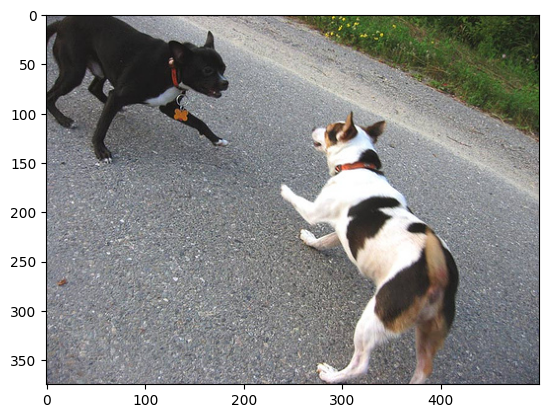

In [36]:
generate_caption("1001773457_577c3a7d70.jpg")

---------------------Actual---------------------
startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq
startseq little girl is sitting in front of large painted rainbow endseq
startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq
startseq there is girl with pigtails sitting in front of rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
--------------------Predicted--------------------
startseq little girl in red dress is painting in the grass endseq


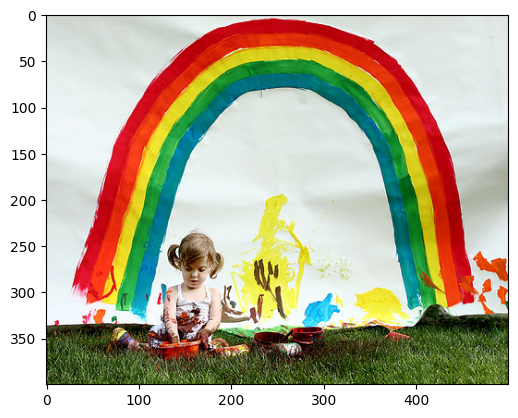

In [37]:
generate_caption("1002674143_1b742ab4b8.jpg")

---------------------Actual---------------------
startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq
startseq little girl is sitting in front of large painted rainbow endseq
startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq
startseq there is girl with pigtails sitting in front of rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
--------------------Predicted--------------------
startseq little girl in red dress is painting in the grass endseq


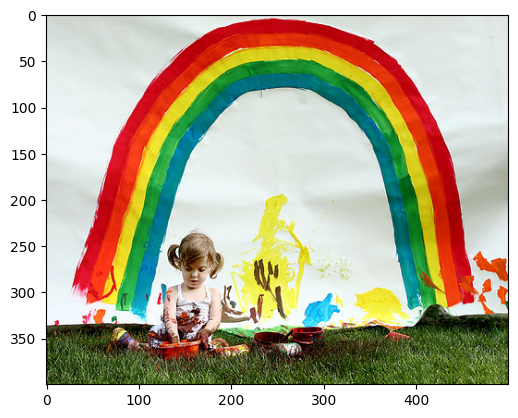

In [38]:
generate_caption("1002674143_1b742ab4b8.jpg")

In [39]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [40]:
image_path = '/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg'
# load image
image = load_img(image_path, target_size=(224, 224))
# convert image pixels to numpy array
image = img_to_array(image)
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# preprocess image for vgg
image = preprocess_input(image)
# extract features
feature = vgg_model.predict(image, verbose=0)
# predict from the trained model
predict_caption(model, feature, tokenizer, max_length)

'startseq little girl in pink dress going down stairs endseq'